C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16364\1097240837.py:26: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  road_length = intersection.length.sum()


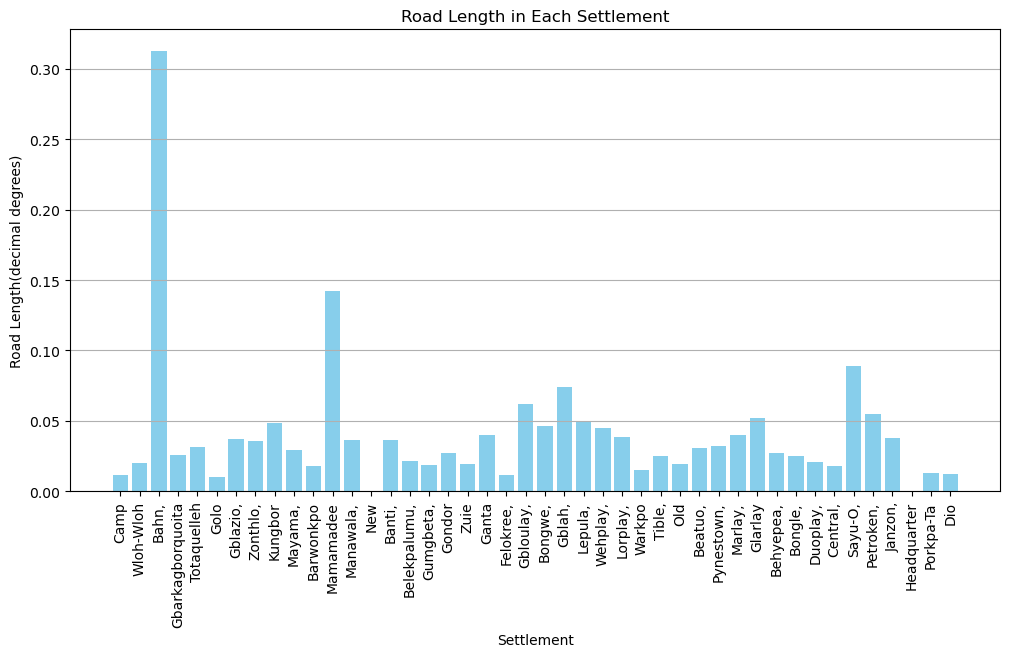

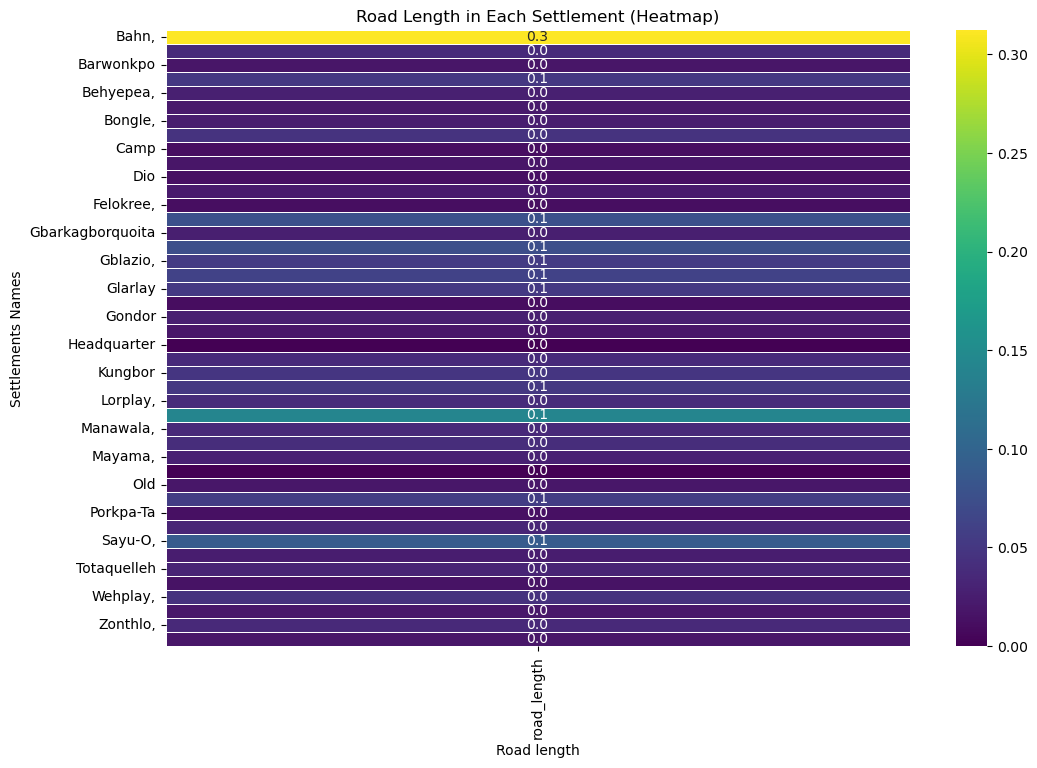

In [25]:
import geopandas as gpd
from shapely.geometry import box
import seaborn as sns 

# Path to the shapefile containing roads
roads_path = "C:/Users/Lenovo/Downloads/FANCY DOCS/VIDA INTERVIEW/Roads/roads.shp"

# Path to the shapefile containing settlements
settlements_path = "C:/Users/Lenovo/Downloads/FANCY DOCS/VIDA INTERVIEW/shapefiles/Geocoded_Locations.shp"

# Read the roads shapefile
roads = gpd.read_file(roads_path)

# Read the settlements shapefile
settlements = gpd.read_file(settlements_path)

# Create a bounding box around each settlement to clip the roads
settlements['geometry'] = settlements['geometry'].apply(lambda x: x.buffer(0.001))

# Initialize an empty list to store road lengths per settlement
road_lengths = []

# Iterate over each settlement and calculate road lengths within it
for index, settlement in settlements.iterrows():
    intersection = roads.intersection(settlement.geometry)
    road_length = intersection.length.sum()
    road_lengths.append(road_length)

# Add road lengths as a new column in the settlements DataFrame
settlements['road_length'] = road_lengths

# Plot road length in each settlement against settlement names
plt.figure(figsize=(12, 6))
plt.bar(settlements['Settlement'], settlements['road_length'], color='skyblue')
plt.title('Road Length in Each Settlement')
plt.xlabel('Settlement')
plt.ylabel('Road Length(decimal degrees)')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()
# Plot the heatmap
heatmap_data = settlements.pivot_table(index='Settlement', values='road_length', aggfunc='sum')
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt=".1f", linewidths=.5)
plt.title('Road Length in Each Settlement (Heatmap)')
plt.xlabel('Road length')
plt.ylabel('Settlements Names')
plt.xticks(rotation=90)
plt.show()